In [2]:
import sys
import os
import nibabel as nb
import numpy as np
import ext.neuron
import scipy
import lab2im
import matplotlib.pyplot as plt
basepath = os.getcwd()

In [4]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir(basepath + '/tutorials/')
# path of the input label map
path_label_map = './data_example/brain_label_map.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'brain.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


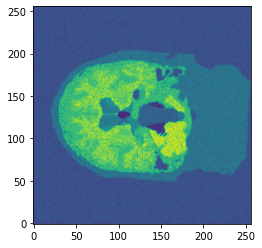

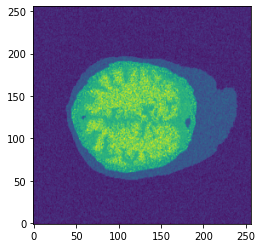

In [5]:
os.chdir(basepath + '/tutorials/generated_images/')
im = nb.load('brain.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
plt.imshow(im[:,:,128],origin='lower')
plt.show()
plt.imshow(im[:,:,80],origin='lower')
plt.show()

(512, 512, 256)


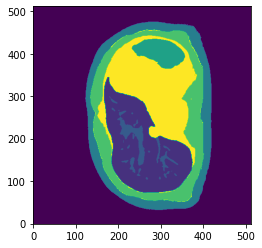

0
7


In [5]:
os.chdir(basepath)
liver = nb.load('liver_all_parts_seg_20180410.nii.gz')
liver = np.array(liver.dataobj)
print(liver.shape)
plt.imshow(liver[:,:,128],origin='lower')
plt.show()
print(np.amin(liver))
print(np.amax(liver))

In [7]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir(basepath)
# path of the input label map
path_label_map = './liver_all_parts_seg_20180410.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'liver.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


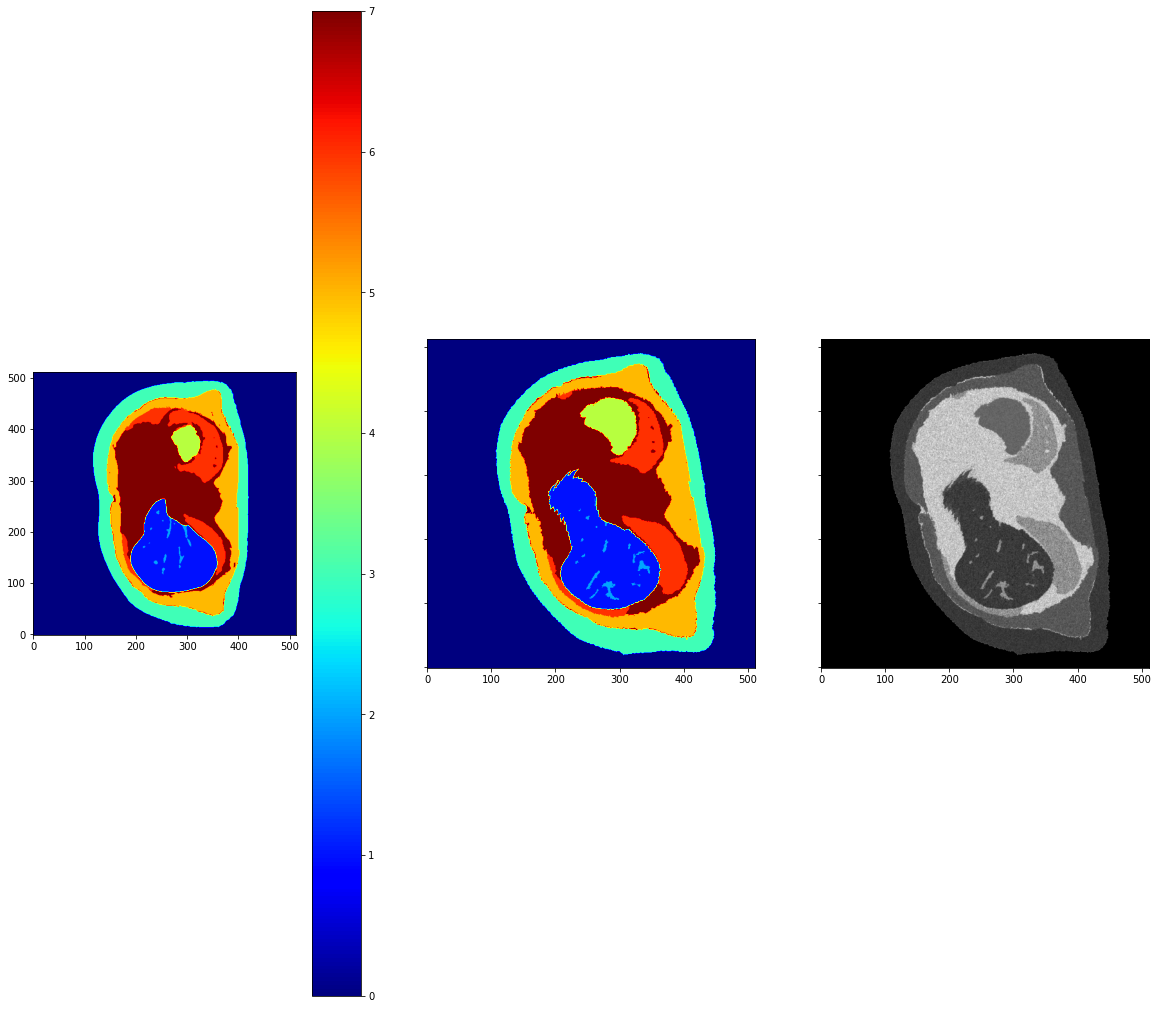

In [16]:
os.chdir(basepath + '/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
sl = 180
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(20,20))
ax1.imshow(liver[:,:,sl],origin='lower',cmap='jet')
ax2.imshow(label[:,:,sl],origin='lower',cmap='jet')
ax3.imshow(im[:,:,sl],origin='lower',cmap='gray')
plt.show()

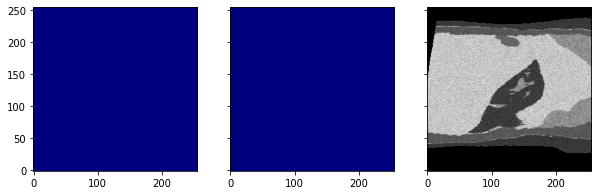

In [25]:
os.chdir(basepath + '/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
im = im[::2,::2,:]
sl = 128
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(10,10))
ax1.imshow(liver[:,sl,:],origin='lower',cmap='jet')
ax2.imshow(label[:,sl,:],origin='lower',cmap='jet')
ax3.imshow(im[:,sl,:],origin='lower',cmap='gray')
plt.show()

In [8]:
os.chdir(basepath+'/tutorials/data_example')
classes = np.load('prior_means.npy')
print(classes)
stds = np.load('prior_stds.npy')
print(stds)

[[15.         98.00008392 59.60008087 30.18745666 78.79997559 84.60007629
  71.19981384 77.19995117 95.60005188 59.60008087 60.99995422 65.40006714
  90.20001526 49.2000061  82.35294118 82.35294118 58.82352941 75.19997253]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.        ]]
[[ 3.25        5.78177483  5.94280157  6.90646706  4.65776638  5.94256874
   4.01533579  4.49714893  3.05167275  5.94280157  3.3729052   2.56969295
   5.13962853  8.51257294  9.02777778  9.02777778 10.83333333 10.92187392]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.        ]]


(256, 256, 256)


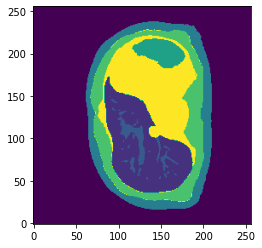

In [9]:
# classes and numbers: 0: background, 1: liver, 2: vasculature in liver, 3: fat, 4: spleen, 5: muscle, 6: lung, 7: general organs
# need to assign susceptibility values to these.
os.chdir(basepath)
liver_means = np.array([[0, -6, -9, -7, -7.12, -7.38, 0, -9],
                        [1,1,1,1,1,1,1,1]])
np.save('liver_means.npy',liver_means)
liver_std = np.array([[2, 4, 2, 2, 2, 2, 2, 2],
                      [1,1,1,1,1,1,1,1]])
np.save('liver_stds.npy',liver_std)
liver = nb.load('liver_all_parts_seg_20180410.nii.gz')
liver = np.array(liver.dataobj)
liver256 = liver[::2,::2,:]
print(liver256.shape)
liver_nii = nb.Nifti1Image(liver256, affine=np.eye(4))
nb.save(liver_nii,'liver_256_all_parts_seg_20180410.nii.gz')
plt.imshow(liver256[:,:,128],origin='lower')

In [10]:
import os
from lab2im.utils import save_volume
from lab2im.image_generator import ImageGenerator

os.chdir(basepath)
# label map to generate images from
path_label_map = './liver_256_all_parts_seg_20180410.nii.gz'

# general parameters
n_examples = 5
result_dir = '/raid/generated_images'
output_shape = None  # shape of the output images, obtained by randomly cropping the generated images

prior_distribution = 'normal'
prior_means = './liver_means.npy'
prior_stds = './liver_stds.npy'

liver_generator = ImageGenerator(labels_dir = path_label_map,
                                prior_distributions=prior_distribution,
                                prior_means=prior_means,
                                prior_stds=prior_stds,
                                )

# create result dir
if not os.path.exists(os.path.join(result_dir)):
    os.mkdir(result_dir)

for n in range(n_examples):

    # generate new image and corresponding labels
    im, lab = liver_generator.generate_image()

    # save output image and label map
    save_volume(im, liver_generator.aff, liver_generator.header, os.path.join(result_dir, 'chi_%s.nii.gz' % n))
    save_volume(lab, liver_generator.aff, liver_generator.header, os.path.join(result_dir, 'chi_labels_%s.nii.gz' % n))

Compiling list of unique labels
processing 1/1


(256, 256, 256)
(256, 256, 256)


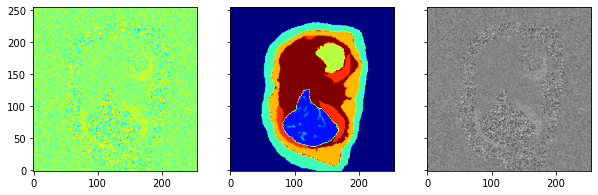

In [12]:
os.chdir('/raid/generated_images/')
im = nb.load('chi_0.nii.gz')
label = nb.load('chi_labels_0.nii.gz')
im = np.array(im.dataobj)
print(im.shape)
label = np.array(label.dataobj)
print(label.shape)
sl = 180
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(10,10))
ax1.imshow(im[:,:,sl],origin='lower',cmap='jet')
ax2.imshow(label[:,:,sl],origin='lower',cmap='jet')
ax3.imshow(im[:,:,sl],origin='lower',cmap='gray')
plt.show()